# PyTorch Tutorial

Adapted from Stanford CS224N, by
### Author: Dilara Soylu

In this notebook, we will have a basic introduction to `PyTorch` and work on a toy NLP task. Following resources have been used in preparation of this notebook:
* ["Word Window Classification" tutorial notebook]((https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1204/materials/ww_classifier.ipynb) by Matt Lamm, from Winter 2020 offering of CS224N
* Official PyTorch Documentation on [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) by Soumith Chintala
* PyTorch Tutorial Notebook, [Build Basic Generative Adversarial Networks (GANs) | Coursera](https://www.coursera.org/learn/build-basic-generative-adversarial-networks-gans) by Sharon Zhou, offered on Coursera

Many thanks to Angelica Sun and John Hewitt for their feedback.

## Introduction
[PyTorch](https://pytorch.org/) is a machine learning framework that is used in both academia and industry for various applications. PyTorch started of as a more flexible alternative to [TensorFlow](https://www.tensorflow.org/), which is another popular machine learning framework. At the time of its release, `PyTorch` appealed to the users due to its user friendly nature: as opposed to defining static graphs before performing an operation as in `TensorFlow`, `PyTorch` allowed users to define their operations as they go, which is also the approached integrated by `TensorFlow` in its following releases. Although `TensorFlow` is more widely preferred in the industry, `PyTorch` is often times the preferred machine learning framework for researchers. If you would like to learn more about the differences between the two, you can check out [this](https://blog.udacity.com/2020/05/pytorch-vs-tensorflow-what-you-need-to-know.html) blog post. 

Now that we have learned enough about the background of `PyTorch`, let's start by importing it into our notebook. To install `PyTorch`, you can follow the instructions here. Alternatively, you can open this notebook using `Google Colab`, which already has `PyTorch` installed in its base kernel. Once you are done with the installation process, run the following cell:

In [1]:
import torch

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

We are all set to start our tutorial. Let's dive in!

## Tensors

Tensors are the most basic building blocks in `PyTorch`.  Tensors are similar to matrices, but the have extra properties and they can represent higher dimensions. For example, an square image with 256 pixels in both sides can be represented by a `3x256x256` tensor, where the first 3 dimensions represent the color channels, red, green and blue. 


### Tensor Initialization
There are several ways to instantiate tensors in `PyTorch`, which we will go through next. 

#### **From a Python List**

We can initalize a tensor from a `Python` list, which could include sublists. The dimensions and the data types will be automatically inferred by `PyTorch` when we use [`torch.tensor()`](https://pytorch.org/docs/stable/generated/torch.tensor.html). 


In [3]:
# Initialize a tensor from a Python List
data = [
        [0, 1], 
        [2, 3],
        [4, 5]
       ]
x_python = torch.tensor(data)

# Print the tensor
x_python

tensor([[0, 1],
        [2, 3],
        [4, 5]])

We can also call `torch.tensor()` with the optional `dtype` parameter, which will set the data type. Some useful datatypes to be familiar with are: `torch.bool`, `torch.float`, and `torch.long`.

We can use the dtype to create a tensor of particular type

In [4]:
x_float = torch.tensor(data, dtype=torch.float)
x_float

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

We can use the dtype to create a tensor of particular type

In [7]:
x_bool = torch.tensor(data, dtype=torch.bool)
x_bool

tensor([[False,  True],
        [ True,  True],
        [ True,  True]])

We can also get the same tensor in our specified data type using methods such as `float()`, `long()` etc. 

In [8]:
x_python.float()

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

We can also use `tensor.FloatTensor`, `tensor.LongTensor`, `tensor.Tensor` classes to instantiate a tensor of particular type. `LongTensor`s are particularly important in NLP as many methods that deal with indices require the indices to be passed as a `LongTensor`, which is a 64 bit integer. 

In [9]:
# `torch.Tensor` defaults to float
# Same as torch.FloatTensor(data)
x = torch.Tensor(data) 
x

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

#### **From a NumPy Array**
We can also initialize a tensor from a `NumPy` array. 

In [10]:
import numpy as np

# Initialize a tensor from a NumPy array
ndarray = np.array(data)
x_numpy = torch.from_numpy(ndarray)

# Print the tensor
x_numpy

tensor([[0, 1],
        [2, 3],
        [4, 5]])

#### **From a Tensor**
We can also initialize a tensor from another tensor, using the following methods:

* `torch.ones_like(old_tensor)`: Initializes a tensor of `1s`.
* `torch.zeros_like(old_tensor)`: Initializes a tensor of `0s`.
* `torch.rand_like(old_tensor)`: Initializes a tensor where all the elements are sampled from a uniform distribution between `0` and `1`.
* `torch.randn_like(old_tensor)`: Initializes a tensor where all the elements are sampled from a normal distribution.

All of these methods preserve the tensor properties of the original tensor passed in, such as the `shape` and `device`, which we will cover in a bit. 

In [11]:
# Initialize a base tensor
x = torch.tensor([[1., 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [12]:
# Initialize a tensor of 0s
x_zeros = torch.zeros_like(x)
x_zeros

tensor([[0., 0.],
        [0., 0.]])

In [13]:
# Initialize a tensor of 1s
x_ones = torch.ones_like(x)
x_ones

tensor([[1., 1.],
        [1., 1.]])

Initialize a tensor where each element is sampled from a uniform distribution
between 0 and 1

In [14]:
x_rand = torch.rand_like(x)
x_rand

tensor([[0.4053, 0.5043],
        [0.2663, 0.6317]])

Initialize a tensor where each element is sampled from a normal distribution

In [16]:
x_randn = torch.randn_like(x)
x_randn

tensor([[-0.3008, -0.2409],
        [ 1.4141,  0.2723]])

#### **By Specifying a Shape**
We can also instantiate tensors by specifying their shapes (which we will cover in more detail in a bit). The methods we could use follow the ones in the previous section:
* `torch.zeros()`
* `torch.ones()`
* `torch.rand()`
* `torch.randn()`

Initialize a 2x3x2 tensor of 0s

In [17]:
shape = (4, 2, 2)
x_zeros = torch.zeros(shape) # x_zeros = torch.zeros(4, 3, 2) is an alternative
x_zeros

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

#### **With `torch.arange()`**
We can also create a tensor with `torch.arange(end)`, which returns a `1-D` tensor with elements ranging from `0` to `end-1`. We can use the optional `start` and `step` parameters to create tensors with different ranges.  

Create a tensor with values 0-9

In [18]:
x = torch.arange(10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Tensor Properties

Tensors have a few properties that are important for us to cover. These are namely `shape`, and the `device` properties. 

#### Data Type

The `dtype` property lets us see the data type of a tensor. 

Initialize a 3x2 tensor, with 3 rows and 2 columns

In [19]:
x = torch.ones(3, 2)
x.dtype

torch.float32

#### Shape

The `shape` property tells us the shape of our tensor. This can help us identify how many dimensional our tensor is as well as how many elements exist in each dimension.

Initialize a 3x2 tensor, with 3 rows and 2 columns

In [20]:
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
x

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Print out its shape: same as x.size()

In [17]:
x.shape 

torch.Size([3, 2])

Print out the number of elements in a particular dimension. 
0th dimension corresponds to the rows

In [21]:
x.shape[0] 

3

We can also get the size of a particular dimension with the `size()` method.


Get the size of the 0th dimension

In [22]:
x.size(0)

3

We can change the shape of a tensor with the `view()` method. 

x_view shares the same memory as x, so changing one changes the other

In [23]:
x_view = x.view(2, 3)
x_view

tensor([[1., 2., 3.],
        [4., 5., 6.]])

We can ask PyTorch to infer the size of a dimension with -1

In [21]:
x_view = x.view(3, -1)
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

We can also use `torch.reshape()` method for a similar purpose. There is a subtle difference between `reshape()` and `view()`: `view()` requires the data to be stored contiguously in the memory. You can refer to [this](https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch) StackOverflow answer for more information. In simple terms, contiguous means that the way our data is laid out in the memory is the same as the way we would read elements from it. This happens because some methods, such as `transpose()` and `view()`, do not actually change how our data is stored in the memory. They just change the meta information about out tensor, so that when we use it we will see the elements in the order we expect. 

`reshape()` calls `view()` internally if the data is stored contiguously, if not, it returns a copy. The difference here isn't too important for basic tensors, but if you perform operations that make the underlying storage of the data non-contiguous (such as taking a transpose), you will have issues using `view()`. If you would like to match the way your tensor is stored in the memory to how it is used, you can use the `contiguous()` method.  

Change the shape of x to be 3x2.
x_reshaped could be a reference to or copy of x

In [22]:
x_reshaped = torch.reshape(x, (2, 3))
x_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.]])

We can use `torch.unsqueeze(x, dim)` function to add a dimension of size `1` to the provided `dim`, where `x` is the tensor. We can also use the corresponding use `torch.squeeze(x)`, which removes the dimensions of size `1`.


Initialize a 5x2 tensor, with 5 rows and 2 columns

In [23]:
x = torch.arange(10).reshape(5, 2)
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

Add a new dimension of size 1 at the 1st dimension

In [24]:
x = x.unsqueeze(1)
x.shape

torch.Size([5, 1, 2])

Squeeze the dimensions of x by getting rid of all the dimensions with 1 element

In [24]:
x = x.squeeze()
x.shape

torch.Size([3, 2])

If we want to get the total number of elements in a tensor, we can use the `numel()` method. 

In [26]:
x.numel()

6

#### **Device**
Device property tells `PyTorch` where to store our tensor. Where a tensor is stored determines which device, `GPU` or `CPU`, would be handling the computations involving it. We can find the device of a tensor with the `device` property.

In [27]:
# Initialize an example tensor
x = torch.Tensor([[1, 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [28]:
# Get the device of the tensor
x.device

device(type='cpu')

We can move a tensor from one device to another with the method `to(device)`.

In [29]:
# Check if a GPU is available, if so, move the tensor to the GPU
if torch.cuda.is_available():
  x.to('cuda') 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


### Tensor Indexing
In `PyTorch` we can index tensors, similar to `NumPy`. 

Create a tensor from a list:

In [32]:
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]], 
                  [[9, 10], [11, 12]] 
                 ])
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [33]:
x.shape

torch.Size([3, 2, 2])

Access the 0th element, which is the first row

In [34]:
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

We can also index into multiple dimensions with `:`.

Get the top left element of each element in our tensor

In [35]:
x[:, 0, 0]

tensor([1., 5., 9.])

We can also access arbitrary elements in each dimension. 

Let's access the 0th and 1st elements, each twice

In [36]:
i = torch.tensor([0, 0, 1, 1])
x[i]

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[5., 6.],
         [7., 8.]]])

Let's access the 0th elements of the 1st and 2nd elements

In [37]:
i = torch.tensor([1, 2])
j = torch.tensor([0])
x[i, j]

tensor([[ 5.,  6.],
        [ 9., 10.]])

We can get a `Python` scalar value from a tensor with `item()`. 

In [38]:
x[0, 0, 0]

tensor(1.)

In [39]:
x[0, 0, 0].item()

1.0

### Operations
PyTorch operations are very similar to those of `NumPy`. We can work with both scalars and other tensors. 


In [40]:
# Create an example tensor
x = torch.ones((3,2,2))
x

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

Perform elementwise addition.<br/>
Use - for subtraction

In [41]:
x + 2

tensor([[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]])

Perform elementwise multiplication. Use / for division

In [42]:
x * 2

tensor([[[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]]])

We can apply the same operations between different tensors of compatible sizes.


Create a 4x3 tensor of 6s

In [43]:
a = torch.ones((4,3)) * 6
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

Create a 1D tensor of 2s

In [44]:
b = torch.ones(3) * 2
b

tensor([2., 2., 2.])

Divide a by b

In [45]:
a / b

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

We can use `tensor.matmul(other_tensor)` for matrix multiplication and `tensor.T` for transpose. Matrix multiplication can also be performed with `@`.

Alternative to a.matmul(b)<br/>
a @ b.T returns the same result since b is 1D tensor and the 2nd dimension
is inferred

In [46]:
a @ b

tensor([36., 36., 36., 36.])

In [47]:
pp.pprint(a.shape)
pp.pprint(a.T.shape)

torch.Size([4, 3])
torch.Size([3, 4])


We can take the mean and standard deviation along a certain dimension with the methods `mean(dim)` and `std(dim)`. That is, if we want to get the mean `3x2` matrix in a `4x3x2` matrix, we would set the `dim` to be 0. We can call these methods with no parameter to get the mean and standard deviation for the whole tensor. To use `mean` and `std` our tensor should be a floating point type. 

In [48]:
# Create an example tensor
m = torch.tensor(
    [
     [1., 1.],
     [2., 2.],
     [3., 3.],
     [4., 4.]
    ]
)

pp.pprint("Mean: {}".format(m.mean()))
pp.pprint("Mean in the 0th dimension: {}".format(m.mean(0)))
pp.pprint("Mean in the 1st dimension: {}".format(m.mean(1)))

'Mean: 2.5'
'Mean in the 0th dimension: tensor([2.5000, 2.5000])'
'Mean in the 1st dimension: tensor([1., 2., 3., 4.])'


In [49]:
m.argmax(1)

tensor([0, 0, 0, 0])

We can concatenate tensors using `torch.cat`.



In [50]:
# Concatenate in dimension 0 and 1
a_cat0 = torch.cat([a, a, a], dim=0)
a_cat1 = torch.cat([a, a, a], dim=1)

print("Initial shape: {}".format(a.shape))
print("Shape after concatenation in dimension 0: {}".format(a_cat0.shape))
print("Shape after concatenation in dimension 1: {}".format(a_cat1.shape))

Initial shape: torch.Size([4, 3])
Shape after concatenation in dimension 0: torch.Size([12, 3])
Shape after concatenation in dimension 1: torch.Size([4, 9])


Most of the operations in `PyTorch` are not in place. However, `PyTorch` offers the in place versions of operations available by adding an underscore (`_`) at the end of the method name. 

In [51]:
# Print our tensor
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

`add()` is not in place

In [52]:
a.add(a)
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

`add_()` is in place

In [53]:
a.add_(a)
a

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]])

## Autograd
`PyTorch` and other machine learning libraries are known for their automatic differantiation feature. That is, given that we have defined the set of operations that need to be performed, the framework itself can figure out how to compute the gradients. We can call the `backward()` method to ask `PyTorch` to calculate the gradiends, which are then stored in the `grad` attribute.

Create an example tensor.
 `requires_grad` parameter tells PyTorch to store gradients

In [47]:
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
x.grad

$$y = 3x^2$$

Calculating the gradient of $y$ with respect to $x$:
    
$$\frac{d y}{d x} = \frac{d 3x^2}{d x} = 6x = 12$$

In [48]:
y = 3 * x * x
y.backward()
x.grad

tensor([12.])

Let's run backprop from a different tensor again to see what happens.

In [49]:
z = 3 * x * x
z.backward()
x.grad

tensor([24.])

We can see that the `x.grad` is updated to be the sum of the gradients calculated so far. When we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong. 

## Neural Network Module

So far we have looked into the tensors, their properties and basic operations on tensors. These are especially useful to get familiar with if we are building the layers of our network from scratch.
We will use predefined blocks in the `torch.nn` module of `PyTorch`. We will then put together these blocks to create complex networks. Let's start by importing this module with an alias so that we don't have to type `torch` every time we use it. 

In [2]:
import torch.nn as nn

### **Linear Layer**
We can use `nn.Linear(H_in, H_out)` to create a a linear layer. This will take a matrix of `(N, *, H_in)` dimensions and output a matrix of `(N, *, H_out)`. The `*` denotes that there could be arbitrary number of dimensions in between. The linear layer performs the operation `Ax+b`, where `A` and `b` are initialized randomly. If we don't want the linear layer to learn the bias parameters, we can initialize our layer with `bias=False`.

In [3]:
# Create the inputs
input = torch.ones(2,3,4)

Make a linear layers transforming N,*,H_in dimensinal inputs to N,*,H_out
dimensional outputs

In [4]:
linear = nn.Linear(4, 2) # H_in = 4, H_out = 2
linear_output = linear(input)
linear_output

tensor([[[ 0.0172, -1.3738],
         [ 0.0172, -1.3738],
         [ 0.0172, -1.3738]],

        [[ 0.0172, -1.3738],
         [ 0.0172, -1.3738],
         [ 0.0172, -1.3738]]], grad_fn=<AddBackward0>)

PyTorch keeps track of the variables present in an expression:

In [5]:
list(linear.parameters()) # Ax + b

[Parameter containing:
 tensor([[ 0.2843, -0.3597, -0.2036, -0.1495],
         [-0.4745, -0.4165, -0.4865, -0.0082]], requires_grad=True),
 Parameter containing:
 tensor([0.4456, 0.0119], requires_grad=True)]

In [6]:
help(nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Linear(in_features: int, out_features: int, bias: bool = True) -> None
 |  
 |  Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
 |  
 |  This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to ``False``, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
 |        additional dimensions and :math:`H_{in} = \text{in\_features}`
 |      - Output: :math:`(N, *, H_{out})` where all but the last dimension
 |        are the same shape as the input and :math:`H_{out} = \text{out\_features}`.
 |  
 |  Attributes:
 |      weight: the learnable weights of the module of shape
 |          :math:`(\text{out\_features}, \t

### **Other Module Layers**
There are several other preconfigured layers in the `nn` module. Some commonly used examples are `nn.Conv2d`, `nn.ConvTranspose2d`, `nn.BatchNorm1d`, `nn.BatchNorm2d`, `nn.Upsample` and `nn.MaxPool2d` among many others.

For now, the only important thing to remember is that we can treat each of these layers as plug and play components: we will be providing the required dimensions and `PyTorch` will take care of setting them up. 

### **Activation Function Layer**
We can also use the `nn` module to apply activations functions to our tensors. Activation functions are used to add non-linearity to our network. Some examples of activations functions are `nn.ReLU()`, `nn.Sigmoid()` and `nn.LeakyReLU()`. Activation functions operate on each element seperately, so the shape of the tensors we get as an output are the same as the ones we pass in.

In [7]:
sigmoid = nn.Sigmoid()
output = sigmoid(linear_output)
output

tensor([[[0.5043, 0.2020],
         [0.5043, 0.2020],
         [0.5043, 0.2020]],

        [[0.5043, 0.2020],
         [0.5043, 0.2020],
         [0.5043, 0.2020]]], grad_fn=<SigmoidBackward>)

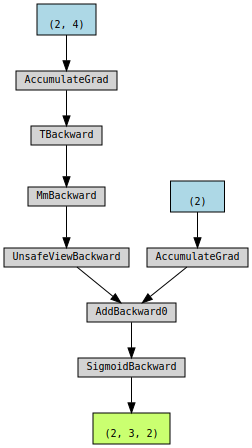

In [8]:
from torchviz import make_dot
make_dot(output)

### **Putting the Layers Together**
So far we have seen that we can create layers and pass the output of one as the input of the next. Instead of creating intermediate tensors and passing them around, we can use `nn.Sequentual`, which does exactly that. 

In [9]:
block = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid()
)

input = torch.ones(2,3,4)
output = block(input)
output

tensor([[[0.6612, 0.8247],
         [0.6612, 0.8247],
         [0.6612, 0.8247]],

        [[0.6612, 0.8247],
         [0.6612, 0.8247],
         [0.6612, 0.8247]]], grad_fn=<SigmoidBackward>)

### Custom Modules

Instead of using the predefined modules, we can also build our own by extending the `nn.Module` class. For example, we can build a the `nn.Linear` (which also extends `nn.Module`) on our own using the tensor introduced earlier! We can also build new, more complex modules, such as a custom neural network. You will be practicing these in the later assignment.

To create a custom module, the first thing we have to do is to extend the `nn.Module`. We can then initialize our parameters in the `__init__` function, starting with a call to the `__init__` function of the super class.

All the class attributes we define which are `nn` module objects are treated as parameters, which can be learned during the training. Tensors are not parameters, but they can be turned into parameters if they are wrapped in `nn.Parameter` class.

All classes extending `nn.Module` are also expected to implement a `forward(x)` function, where `x` is a tensor. This is the function that is called when a parameter is passed to our module, such as in `model(x)`.

In [22]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size 
    self.hidden_size = hidden_size 

    # Defining of our model
    self.model = nn.Sequential(
        nn.Linear(self.input_size, self.hidden_size),
        nn.ReLU(),
        nn.Linear(self.hidden_size, self.input_size),
        nn.Sigmoid()
    )
    
  def forward(self, x):
    output = self.model(x)
    return output

Here is an alternative way to define the same class. You can see that we can replace `nn.Sequential` by defining the individual layers in the `__init__` method and connecting them in the `forward` method. 

In [64]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size 
    self.hidden_size = hidden_size 

    # Defining of our layers
    self.linear = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.input_size)
    self.sigmoid = nn.Sigmoid()
    
  def forward(self, x):
    linear = self.linear(x)
    relu = self.relu(linear)
    linear2 = self.linear2(relu)
    output = self.sigmoid(linear2)
    return output

Now that we have defined our class, we can instantiate it and see what it does. 

In [65]:
# Make a sample input
input = torch.randn(2, 5)

# Create our model
mlp = MultilayerPerceptron(5, 3)

# Pass our input through our model
mlp(input)

tensor([[0.6139, 0.4648, 0.6163, 0.5344, 0.3689],
        [0.5506, 0.4831, 0.5785, 0.5397, 0.3397]], grad_fn=<SigmoidBackward>)

We can inspect the parameters of our model with `named_parameters()` and `parameters()` methods. 

In [66]:
list(mlp.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[-0.2388,  0.4095, -0.1509, -0.1585, -0.4327],
          [-0.2561,  0.1117, -0.0590, -0.3246,  0.0105],
          [-0.3055, -0.3794, -0.2463, -0.3914, -0.2848]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([0.4470, 0.0845, 0.1378], requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
  tensor([[-0.5385, -0.3792, -0.1922],
          [ 0.0903, -0.5080, -0.2488],
          [-0.3456,  0.0016, -0.2148],
          [-0.0400, -0.3912, -0.3963],
          [-0.3368, -0.1976, -0.4557]], requires_grad=True)),
 ('linear2.bias',
  Parameter containing:
  tensor([ 0.4841, -0.1146,  0.4968,  0.1799, -0.4889], requires_grad=True))]

## Optimization
We have shown how gradients are calculated with the `backward()` function. Having the gradients isn't enought for our models to learn. We also need to know how to update the parameters of our models. This is where the optomozers comes in.

`torch.optim` module contains several optimizers that we can use. Some popular examples are `optim.SGD` and `optim.Adam`. When initializing optimizers, we pass our model parameters, which can be accessed with `model.parameters()`, telling the optimizers which values it will be optimizing. Optimizers also has a learning rate (`lr`) parameter, which determines how big of an update will be made in every step. Different optimizers have different hyperparameters as well.

In [67]:
import torch.optim as optim

After we have our optimization function, we can define a `loss` that we want to optimize for. We can either define the loss ourselves, or use one of the predefined loss function in `PyTorch`, such as `nn.BCELoss()`, Binary Cross Entropy.

Let's put everything together now! We will start by creating some dummy data. 

In [68]:
# Create the y data
y = torch.ones(10, 5)

# Add some noise to our goal y to generate our x
# We want out model to predict our original data, despite the noise
x = y + torch.randn_like(y)
x

tensor([[ 2.6354,  1.6547,  1.5760,  0.6391,  0.9394],
        [ 1.0733,  1.8187,  2.4805,  2.0331,  0.3133],
        [ 1.6368,  1.2176,  0.9533, -0.4335,  0.4335],
        [ 0.5747,  0.7896,  0.2672,  1.1043,  2.0414],
        [ 0.6003, -1.2933,  1.4976,  0.5743,  0.5825],
        [-0.1955,  1.8123,  0.6937,  0.6698,  0.0192],
        [ 1.1947, -0.6535,  0.2692,  1.1748,  0.4774],
        [ 1.7165,  2.5335, -0.4510,  0.2139,  0.0437],
        [-0.2476,  0.2501,  1.7099, -0.5326,  0.2749],
        [ 1.4664,  1.6667,  0.9561,  1.2368,  0.2939]])

Now, we can define our model, optimizer and the loss function. 

In [81]:
# Instantiate the model
mlp = MultilayerPerceptron(5, 3)

# Define the optimizer
mlp_adam = optim.Adam(mlp.parameters(), lr=1e-1)

# Define loss using a predefined loss function
mlp_loss_function = nn.BCELoss()

# Calculate how our model is doing now
y_pred = mlp(torch.tensor(x_train))
mlp_loss_function(y_pred, y_train).item()

<ipython-input-81-0854ac2f7ca7>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = mlp(torch.tensor(x_train))


0.7258154153823853

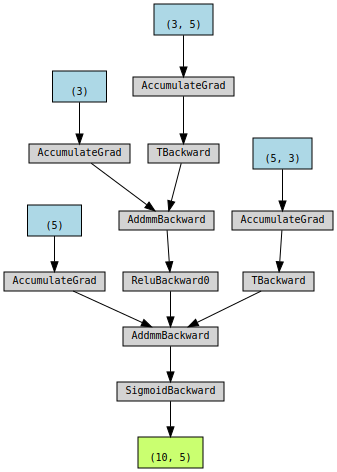

In [82]:
make_dot(y_pred)

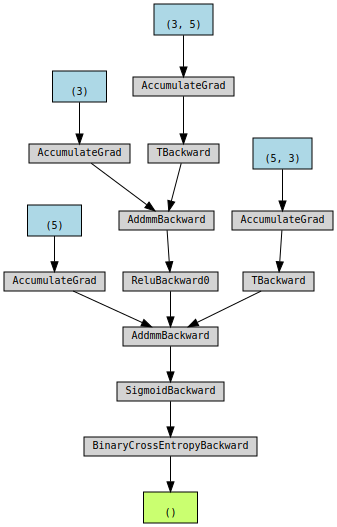

In [83]:
make_dot(mlp_loss_function(y_pred, y_train))

Let's see if we can have our model achieve a smaller loss. Now that we have everything we need, we can setup our training loop. 

In [84]:
# Set the number of epoch, which determines the number of training iterations
n_epoch = 10 

for epoch in range(n_epoch):
  # Set the gradients to 0
  mlp_adam.zero_grad()

  # Get the model predictions
  y_pred = mlp(x_train)

  # Get the loss
  loss = mlp_loss_function(y_pred, y_train)

  # Print stats
  print(f"Epoch {epoch}: traing loss: {loss}")

  # Compute the gradients
  loss.backward()

  # Take a step to optimize the weights
  mlp_adam.step()

Epoch 0: traing loss: 0.7258154153823853
Epoch 1: traing loss: 0.6332100033760071
Epoch 2: traing loss: 0.5517269968986511
Epoch 3: traing loss: 0.4693896472454071
Epoch 4: traing loss: 0.38536524772644043
Epoch 5: traing loss: 0.30662333965301514
Epoch 6: traing loss: 0.23861147463321686
Epoch 7: traing loss: 0.18278011679649353
Epoch 8: traing loss: 0.13916952908039093
Epoch 9: traing loss: 0.1066889837384224


In [85]:
list(mlp.parameters())

[Parameter containing:
 tensor([[ 0.8147,  0.8913,  0.7634,  0.9919,  1.0139],
         [-0.4873, -0.3259, -0.7296, -0.5109, -0.0876],
         [-0.2203, -0.1273,  0.4282, -1.1687,  0.1692]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3495, -0.5294, -0.0841], requires_grad=True),
 Parameter containing:
 tensor([[ 1.0091, -0.0204,  0.2223],
         [ 1.2082, -0.0107,  0.6367],
         [ 1.2021,  0.1516,  0.6472],
         [ 0.8843,  0.2822,  0.4044],
         [ 0.4509, -0.0479,  0.3914]], requires_grad=True),
 Parameter containing:
 tensor([1.4580, 0.6371, 0.5310, 1.0574, 1.1056], requires_grad=True)]

You can see that our loss is decreasing. Let's check the predictions of our model now and see if they are close to our original `y`, which was all `1s`. 

In [87]:
# See how our model performs on the training data
y_pred = mlp(x_train)
y_pred[:5], y_train[:5]

(tensor([[0.9977, 0.9979, 0.9976, 0.9939, 0.9595],
         [0.9928, 0.9918, 0.9906, 0.9836, 0.9343],
         [0.9996, 0.9998, 0.9998, 0.9988, 0.9847],
         [0.9999, 0.9999, 0.9999, 0.9995, 0.9884],
         [0.8484, 0.8013, 0.7863, 0.8237, 0.8279]], grad_fn=<SliceBackward>),
 tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]))

Create test data and check how our model performs on it

In [89]:
x_val = y + torch.randn_like(y)
y_pred = mlp(x_val)
y_pred[:5], y_val[:5]

(tensor([[0.9978, 0.9980, 0.9977, 0.9942, 0.9604],
         [0.9986, 0.9988, 0.9987, 0.9961, 0.9674],
         [0.9946, 0.9952, 0.9946, 0.9886, 0.9495],
         [0.9997, 0.9998, 0.9998, 0.9990, 0.9838],
         [0.9999, 0.9999, 0.9999, 0.9995, 0.9880]], grad_fn=<SliceBackward>),
 tensor([], size=(0, 5)))

Great! Looks like our model almost perfectly learned to filter out the noise from the `x` that we passed in!

## Demo: Word Window Classification

Until this part of the notebook, we have learned the fundamentals of PyTorch and built a basic network solving a toy task. Now we will attempt to solve an example NLP task. Here are the things we will learn:

1. Data: Creating a Dataset of Batched Tensors
2. Modeling
3. Training
4. Prediction

In this section, our goal will be to train a model that will find the words in a sentence corresponding to a `LOCATION`, which will be always of span `1` (meaning that `San Fransisco` won't be recognized as a `LOCATION`). Our task is called `Word Window Classification` for a reason. Instead of letting our model to only take a look at one word in each forward pass, we would like it to be able to consider the context of the word in question. That is, for each word, we want our model to be aware of the surrounding words. Let's dive in!

### Data

The very first task of any machine learning project is to set up our training set. Usually, there will be a training corpus we will be utilizing. In NLP tasks, the corpus would generally be a `.txt` or `.csv` file where each row corresponds to a sentence or a tabular datapoint. In our toy task, we will assume that we have already read our data and the corresponding labels into a `Python` list.

Our raw data, which consists of sentences:

In [90]:
corpus = [
          "We always come to Paris",
          "The professor is from Australia",
          "I live in Stanford",
          "He comes from Taiwan",
          "The capital of Turkey is Ankara"
         ]

#### Preprocessing

To make it easier for our models to learn, we usually apply a few preprocessing steps to our data. This is especially important when dealing with text data. Here are some examples of text preprocessing:
* **Tokenization**: Tokenizing the sentences into words.
* **Lowercasing**: Changing all the letters to be lowercase.
* **Noise removal:** Removing special characters (such as punctuations). 
* **Stop words removal**: Removing commonly used words.

Which preprocessing steps are necessary is determined by the task at hand. For example, although it is useful to remove special characters in some tasks, for others they may be important (for example, if we are dealing with multiple languages). For our task, we will lowercase our words and tokenize. 


The preprocessing function we will use to generate our training examples.
Our function is a simple one, we lowercase the letters
and then tokenize the words.

In [91]:
def preprocess_sentence(sentence):
  return sentence.lower().split()

# Create our training set
train_sentences = [sent.lower().split() for sent in corpus]
train_sentences

[['we', 'always', 'come', 'to', 'paris'],
 ['the', 'professor', 'is', 'from', 'australia'],
 ['i', 'live', 'in', 'stanford'],
 ['he', 'comes', 'from', 'taiwan'],
 ['the', 'capital', 'of', 'turkey', 'is', 'ankara']]

For each training example we have, we should also have a corresponding label. Recall that the goal of our model was to determine which words correspond to a `LOCATION`. That is, we want our model to output `0` for all the words that are not `LOCATION`s and `1` for the ones that are `LOCATION`s.

In [92]:
# Set of locations that appear in our corpus
locations = set(["australia", "ankara", "paris", "stanford", "taiwan", "turkey"])

# Our train labels
train_labels = [[1 if word in locations else 0 for word in sent] for sent in train_sentences]
train_labels

[[0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1]]

#### Converting Words to Embeddings

Let's look at our training data a little more closely. Each datapoint we have is a sequence of words. On the other hand, we know that machine learning models work with numbers in vectors. How are we going to turn words into numbers? You may be thinking embeddings and you are right!

Imagine that we have an embedding lookup table `E`, where each row corresponds to an embedding. That is, each word in our vocabulary would have a corresponding embedding row `i` in this table. Whenever we want to find an embedding for a word, we will follow these steps:
1. Find the corresponding index `i` of the word in the embedding table: `word->index`.
2. Index into the embedding table and get the embedding: `index->embedding`.

Let's look at the first step. We should assign all the words in our vocabulary to a corresponding index. We can do it as follows:
1. Find all the unique words in our corpus.
2. Assign an index to each.

Find all the unique words in our corpus 

In [93]:
vocabulary = set(w for s in train_sentences for w in s)
vocabulary

{'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'in',
 'is',
 'live',
 'of',
 'paris',
 'professor',
 'stanford',
 'taiwan',
 'the',
 'to',
 'turkey',
 'we'}

`vocabulary` now contains all the words in our corpus. On the other hand, during the test time, we can see words that are not contained in our vocabulary. If we can figure out a way to represent the unknown words, our model can still reason about whether they are a `LOCATION` or not, since we are also looking at the neighboring words for each prediction. 

We introduce a special token, `<unk>`, to tackle the words that are out of vocabulary. We could pick another string for our unknown token if we wanted. The only requirement here is that our token should be unique: we should only be using this token for unknown words. We will also add this special token to our vocabulary. 

In [94]:
vocabulary.add("<unk>")

Earlier we mentioned that our task was called `Word Window Classification` because our model is looking at the surroundings words in addition to the given word when it needs to make a prediction. 

For example, let's take the sentence "We always come to Paris". The corresponding training label for this sentence is `0, 0, 0, 0, 1` since only Paris, the last word, is a `LOCATION`. In one pass (meaning a call to `forward()`), our model will try to generate the correct label for one word. Let's say our model is trying to generate the correct label `1` for `Paris`. If we only allow our model to see `Paris`, but nothing else, we will miss out on the important information that the word `to` often times appears with `LOCATION`s. 

Word windows allow our model to consider the surrounding `+N` or `-N` words of each word when making a prediction. In our earlier example for `Paris`, if we have a window size of 1, that means our model will look at the words that come immediately before and after `Paris`, which are `to`, and, well, nothing. Now, this raises another issue. `Paris` is at the end of our sentence, so there isn't another word following it. Remember that we define the input dimensions of our `PyTorch` models when we are initializing them. If we set the window size to be `1`, it means that our model will be accepting `3` words in every pass. We cannot have our model expect `2` words from time to time.

The solution is to introduce a special token, such as `<pad>`, that will be added to our sentences to make sure that every word has a valid window around them. Similar to `<unk>` token, we could pick another string for our pad token if we wanted, as long as we make sure it is used for a unique purpose. 

In [95]:
vocabulary.add("<pad>")

Function that pads the given sentence.
We are introducing this function here as an example.
We will be utilizing it later in the tutorial.

In [96]:
def pad_window(sentence, window_size, pad_token="<pad>"):
  window = [pad_token] * window_size
  return window + sentence + window

# Show padding example
window_size = 2
pad_window(train_sentences[0], window_size=window_size)

['<pad>', '<pad>', 'we', 'always', 'come', 'to', 'paris', '<pad>', '<pad>']

Now that our vocabularly is ready, let's assign an index to each of our words. 

We are just converting our vocabularly to a list to be able to index into it.
Sorting is not necessary, we sort to show an ordered word_to_ind dictionary

That being said, we will see that having the index for the padding token
be 0 is convenient as some PyTorch functions use it as a default value
such as nn.utils.rnn.pad_sequence, which we will cover in a bit

In [97]:
ix_to_word = sorted(list(vocabulary))

# Creating a dictionary to find the index of a given word
word_to_ix = {word: ind for ind, word in enumerate(ix_to_word)}
word_to_ix

{'<pad>': 0,
 '<unk>': 1,
 'always': 2,
 'ankara': 3,
 'australia': 4,
 'capital': 5,
 'come': 6,
 'comes': 7,
 'from': 8,
 'he': 9,
 'i': 10,
 'in': 11,
 'is': 12,
 'live': 13,
 'of': 14,
 'paris': 15,
 'professor': 16,
 'stanford': 17,
 'taiwan': 18,
 'the': 19,
 'to': 20,
 'turkey': 21,
 'we': 22}

In [98]:
ix_to_word[1]

'<unk>'

Great! We are ready to convert our training sentences into a sequence of indices corresponding to each token. 

In [99]:
def convert_tokens_to_indices(sentence, word_to_ix):
  """Get the index for each token, if it is in our vocabularly, or else get the index for the unknown token."""
  return [word_to_ix.get(token, word_to_ix["<unk>"]) for token in sentence]

# Show an example
example_sentence = ["we", "always", "come", "to", "kuwait"]
example_indices = convert_tokens_to_indices(example_sentence, word_to_ix)
restored_example = [ix_to_word[ind] for ind in example_indices]

print(f"Original sentence is: {example_sentence}")
print(f"Going from words to indices: {example_indices}")
print(f"Going from indices to words: {restored_example}")

Original sentence is: ['we', 'always', 'come', 'to', 'kuwait']
Going from words to indices: [22, 2, 6, 20, 1]
Going from indices to words: ['we', 'always', 'come', 'to', '<unk>']


In the example above, `kuwait` shows up as `<unk>`, because it is not included in our vocabulary. Let's convert our `train_sentences` to `example_padded_indices`. 

Converting our sentences to indices

In [100]:
example_indices = [convert_tokens_to_indices(s, word_to_ix) for s in train_sentences]
example_indices

[[22, 2, 6, 20, 15],
 [19, 16, 12, 8, 4],
 [10, 13, 11, 17],
 [9, 7, 8, 18],
 [19, 5, 14, 21, 12, 3]]

##### Embedding Layer

Now that we have an index for each word in our vocabularly, we can create an embedding table with `nn.Embedding` class in `PyTorch`. It is called as follows `nn.Embedding(num_words, embedding_dimension)` where `num_words` is the number of words in our vocabulary and the `embedding_dimension` is the dimension of the embeddings we want to have. There is nothing fancy about `nn.Embedding`: it is just a wrapper class around a trainabe `NxE` dimensional tensor, where `N` is the number of words in our vocabulary and `E` is the number of embedding dimensions. This table is initially random, but it will change over time. As we train our network, the gradients will be backpropagated all the way to the embedding layer, and hence our word embeddings would be updated. We will initiliaze the embedding layer we will use for our model in our model, but we are showing an example here. 

In [101]:
embedding_dim = 5
embeds = nn.Embedding(len(vocabulary), embedding_dim)

# Printing the parameters in our embedding table
list(embeds.parameters())

[Parameter containing:
 tensor([[-1.3246e+00, -5.1608e-01,  6.0018e-01, -4.7022e-01, -6.0864e-01],
         [-4.6192e-02, -1.6457e+00, -6.9602e-01, -7.4029e-01,  3.1428e-01],
         [ 1.4156e-01,  1.0348e+00, -6.2644e-01, -5.1509e-01,  6.9029e-01],
         [ 2.0403e+00,  1.1366e+00, -4.6184e-01,  1.4200e+00,  8.4852e-01],
         [-4.7891e-02,  6.6856e-01,  1.0430e+00,  7.2045e-01, -1.3129e+00],
         [ 3.7804e-02, -1.1702e+00, -1.0319e-01,  1.1895e+00,  7.6069e-01],
         [-7.4630e-01, -5.8236e-01,  4.8687e-01, -1.0020e+00,  3.2949e-02],
         [-4.2920e-01, -9.8180e-01, -6.4206e-01,  8.2659e-01, -3.6460e-01],
         [-1.2081e-01, -4.8302e-01,  1.1330e-01,  7.7151e-02, -9.2281e-01],
         [-1.2620e+00,  1.0861e+00, -8.7859e-01, -6.8369e-01,  6.6043e-02],
         [-7.7380e-04,  1.6206e-01,  1.1960e+00, -1.3062e+00, -1.4040e+00],
         [ 9.5265e-02,  3.0573e-01,  4.1506e-01, -7.1741e-01,  2.8340e+00],
         [ 1.9535e+00,  2.0487e+00, -1.0880e+00, -2.0479e+00,  8.

To get the word embedding for a word in our vocabulary, all we need to do is to create a lookup tensor. The lookup tensor is just a tensor containing the index we want to look up `nn.Embedding` class expects an index tensor that is of type Long Tensor, so we should create our tensor accordingly. 

In [102]:
index = word_to_ix["paris"]
index_tensor = torch.tensor(index, dtype=torch.long)
paris_embed = embeds(index_tensor)
paris_embed

tensor([-0.4488, -0.0305,  0.3830, -0.0448, -2.3120],
       grad_fn=<EmbeddingBackward>)

In [103]:
# We can also get multiple embeddings at once
index_paris = word_to_ix["paris"]
index_ankara = word_to_ix["ankara"]
indices = [index_paris, index_ankara]
indices_tensor = torch.tensor(indices, dtype=torch.long)
embeddings = embeds(indices_tensor)
embeddings

tensor([[-0.4488, -0.0305,  0.3830, -0.0448, -2.3120],
        [ 2.0403,  1.1366, -0.4618,  1.4200,  0.8485]],
       grad_fn=<EmbeddingBackward>)

Usually, we define the embedding layer as part of our model, which you will see in the later sections of our notebook. 

#### Batching Sentences

We have learned about batches in class. Waiting our whole training corpus to be processed before making an update is costly. On the other hand, updating the parameters after every training example causes the loss to be less stable between updates. To combat these issues, we instead update our parameters after training on a batch of data. This allows us to get a better estimate of the gradient of the global loss. In this section, we will learn how to structure our data into batches using the `torch.util.data.DataLoader` class. 

We will be calling the `DataLoader` class as follows: `DataLoader(data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)`.  The `batch_size` parameter determines the number of examples per batch. In every epoch, we will be iterating over all the batches using the `DataLoader`. The order of batches is deterministic by default, but we can ask `DataLoader` to shuffle the batches by setting the `shuffle` parameter to `True`. This way we ensure that we don't encounter a bad batch multiple times.

If provided, `DataLoader` passes the batches it prepares to the `collate_fn`. We can write a custom function to pass as `collate_fn` parameter in order to perform extra processing. In our case, we will use the `collate_fn` to:
1. Pad the sentences to `window_size`.
2. Convert the tokens to indices.
3. Pad sentences and labels to have the same length. This creates an issue because when calculating the loss, we need to know the actual number of tokens in a given example. We will keep track of these lenghts returning them from `collate_fn`.

In [104]:
from torch.utils.data import DataLoader

def custom_collate_fn(batch, window_size, word_to_ix):
  # Break our batch into the training examples (x) and labels (y)
  x, y = zip(*batch)

  # Pad the train examples.
  x = [pad_window(s, window_size=window_size) for s in x]

  # Convert the train examples into indices.
  x = [convert_tokens_to_indices(s, word_to_ix) for s in x]

  # We will now pad the examples so that the lengths of all the example in 
  # one batch are the same, making it possible to do matrix operations. 
  # We set the batch_first parameter to True so that the returned matrix has 
  # the batch as the first dimension.
  pad_token_ix = word_to_ix["<pad>"]

  # pad_sequence function expects the input to be a tensor, so we turn x into one
  x = [torch.LongTensor(x_i) for x_i in x]
  x_padded = nn.utils.rnn.pad_sequence(x, batch_first=True, padding_value=pad_token_ix)

  # We also pad the labels. Before doing so, we will record the number 
  # of labels so that we know how many words existed in each example. 
  lengths = [len(label) for label in y]
  lenghts = torch.LongTensor(lengths)

  y = [torch.LongTensor(y_i) for y_i in y]
  y_padded = nn.utils.rnn.pad_sequence(y, batch_first=True, padding_value=0)

  return x_padded, y_padded, lenghts  

Our model will be a window classifier.
When we pass this input to our model, it needs to create the windows for each word, make a prediction as to whether the center word is a `LOCATION` or not for each window, put the predictions together and return. 

We could format our data by breaking it into windows beforehand. Here, we will instead have our model to take care of the formatting. 

Given that our `window_size` is `N` we want our model to make a prediction on every `2N+1` tokens.

That is, if we have a `window_size` of `2`, we want our model to make a prediction on every `5` tokens.
If the input has `6` tokens, it will make exactly `6` predictions, since we padded it with `2` tokens on each side.

We can create these windows by using `for` loops, but there is a faster `PyTorch` alternative, which is the `unfold(dimension, size, step)` method. We can create the windows we need using this method as follows:

In [105]:
padded_sent = convert_tokens_to_indices(pad_window(train_sentences[0], window_size=window_size), word_to_ix)
batch = torch.tensor([padded_sent])
batch

tensor([[ 0,  0, 22,  2,  6, 20, 15,  0,  0]])

In [106]:
help(batch.unfold)

Help on built-in function unfold:

unfold(...) method of torch.Tensor instance
    unfold(dimension, size, step) -> Tensor
    
    Returns a view of the original tensor which contains all slices of size :attr:`size` from
    :attr:`self` tensor in the dimension :attr:`dimension`.
    
    Step between two slices is given by :attr:`step`.
    
    If `sizedim` is the size of dimension :attr:`dimension` for :attr:`self`, the size of
    dimension :attr:`dimension` in the returned tensor will be
    `(sizedim - size) / step + 1`.
    
    An additional dimension of size :attr:`size` is appended in the returned tensor.
    
    Args:
        dimension (int): dimension in which unfolding happens
        size (int): the size of each slice that is unfolded
        step (int): the step between each slice
    
    Example::
    
        >>> x = torch.arange(1., 8)
        >>> x
        tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.])
        >>> x.unfold(0, 2, 1)
        tensor([[ 1.,  2.],
       

Create the 2 * 2 + 1 chunks

In [107]:
chunk = batch.unfold(1, window_size*2 + 1, 1)
print(f"Windows:\n", chunk)

Windows:
 tensor([[[ 0,  0, 22,  2,  6],
         [ 0, 22,  2,  6, 20],
         [22,  2,  6, 20, 15],
         [ 2,  6, 20, 15,  0],
         [ 6, 20, 15,  0,  0]]])


### Model

Now that we have prepared our data, we are ready to build our model. We have learned how to write custom `nn.Module` classes. We will do the same here and put everything we have learned so far together. 

In [108]:
class WordWindowClassifier(nn.Module):

  def __init__(self, hyperparameters, vocab_size, pad_ix=0):
    super(WordWindowClassifier, self).__init__()
    
    """ Instance variables """
    self.window_size = hyperparameters["window_size"]
    self.embed_dim = hyperparameters["embed_dim"]
    self.hidden_dim = hyperparameters["hidden_dim"]
    self.freeze_embeddings = hyperparameters["freeze_embeddings"]

    """ Embedding Layer 
    Takes in a tensor containing embedding indices, and returns the 
    corresponding embeddings. The output is of dim 
    (number_of_indices * embedding_dim).

    If freeze_embeddings is True, set the embedding layer parameters to be
    non-trainable. This is useful if we only want the parameters other than the
    embeddings parameters to change. 

    """
    self.embeds = nn.Embedding(vocab_size, self.embed_dim, padding_idx=pad_ix)
    if self.freeze_embeddings:
      self.embed_layer.weight.requires_grad = False

    """ Hidden Layer
    """
    full_window_size = 2 * window_size + 1
    self.hidden_layer = nn.Sequential(
      nn.Linear(full_window_size * self.embed_dim, self.hidden_dim), 
      nn.Tanh()
    )

    """ Output Layer
    """
    self.output_layer = nn.Linear(self.hidden_dim, 1)

    """ Probabilities 
    """
    self.probabilities = nn.Sigmoid()

  def forward(self, inputs):
    """
    Let B:= batch_size
        L:= window-padded sentence length
        D:= self.embed_dim
        S:= self.window_size
        H:= self.hidden_dim
        
    inputs: a (B, L) tensor of token indices
    """
    B, L = inputs.size()

    """
    Reshaping.
    Takes in a (B, L) LongTensor
    Outputs a (B, L~, S) LongTensor
    """
    # Fist, get our word windows for each word in our input.
    token_windows = inputs.unfold(1, 2 * self.window_size + 1, 1)
    _, adjusted_length, _ = token_windows.size()

    # Good idea to do internal tensor-size sanity checks, at the least in comments!
    assert token_windows.size() == (B, adjusted_length, 2 * self.window_size + 1)

    """
    Embedding.
    Takes in a torch.LongTensor of size (B, L~, S) 
    Outputs a (B, L~, S, D) FloatTensor.
    """
    embedded_windows = self.embeds(token_windows)

    """
    Reshaping.
    Takes in a (B, L~, S, D) FloatTensor.
    Resizes it into a (B, L~, S*D) FloatTensor.
    -1 argument "infers" what the last dimension should be based on leftover axes.
    """
    embedded_windows = embedded_windows.view(B, adjusted_length, -1)

    """
    Layer 1.
    Takes in a (B, L~, S*D) FloatTensor.
    Resizes it into a (B, L~, H) FloatTensor
    """
    layer_1 = self.hidden_layer(embedded_windows)

    """
    Layer 2
    Takes in a (B, L~, H) FloatTensor.
    Resizes it into a (B, L~, 1) FloatTensor.
    """
    output = self.output_layer(layer_1)

    """
    Softmax.
    Takes in a (B, L~, 1) FloatTensor of unnormalized class scores.
    Outputs a (B, L~, 1) FloatTensor of (log-)normalized class scores.
    """
    output = self.probabilities(output)
    output = output.view(B, -1)

    return output

### Training

We are now ready to put everything together. Let's start with preparing our data and intializing our model. We can then intialize our optimizer and define our loss function. This time, instead of using one of the predefined loss function as we did before, we will define our own loss function. 

Prepare the data

In [109]:
data = list(zip(train_sentences, train_labels))
batch_size = 2
shuffle = True
window_size = 2

Here we fix the parameters `window_size` and `word_to_ix` of `custom_collate_fn` using `partial`, to obtain a function with a single parameter `batch`:

In [110]:
from functools import partial

collate_fn = partial(custom_collate_fn, window_size=window_size, word_to_ix=word_to_ix)

In [111]:
# Instantiate a DataLoader
wwc_loader = DataLoader(data, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)

# Initialize a model
# It is useful to put all the model hyperparameters in a dictionary
wwc_hyperparameters = {
    "batch_size": 4,
    "window_size": 2,
    "embed_dim": 25,
    "hidden_dim": 25,
    "freeze_embeddings": False,
}

vocab_size = len(word_to_ix)
wwc = WordWindowClassifier(wwc_hyperparameters, vocab_size)

# Define an optimizer
learning_rate = 0.01
wwc_optimizer = torch.optim.SGD(wwc.parameters(), lr=learning_rate)

# Define a loss function, which computes to binary cross entropy loss
def wwc_loss_function(batch_outputs, batch_labels, batch_lengths):   
    # Calculate the loss for the whole batch
    bceloss = nn.BCELoss()
    loss = bceloss(batch_outputs, batch_labels.float())

    # Rescale the loss. Remember that we have used lengths to store the 
    # number of words in each training example
    loss = loss / batch_lengths.sum().float()

    return loss

Unlike our earlier example, this time instead of passing all of our training data to the model at once in each epoch, we will be utilizing batches. Hence, in each training epoch iteration, we also iterate over the batches.

In [112]:
# Function that will be called in every epoch
def train_epoch(loss_function, optimizer, model, loader):
  
  # Keep track of the total loss for the batch
  total_loss = 0
  for batch_inputs, batch_labels, batch_lengths in loader:
    # Clear the gradients
    optimizer.zero_grad()
    # Run a forward pass
    outputs = model.forward(batch_inputs)
    # Compute the batch loss
    loss = loss_function(outputs, batch_labels, batch_lengths)
    # Calculate the gradients
    loss.backward()
    # Update the parameteres
    optimizer.step()
    total_loss += loss.item()

  return total_loss

Function performing our main training loop:

In [113]:
def train(loss_function, optimizer, model, loader, num_epochs=10000):

  # Iterate through each epoch and call our train_epoch function
  for epoch in range(num_epochs):
    epoch_loss = train_epoch(loss_function, optimizer, model, loader)
    if epoch % 100 == 0: print(epoch_loss)

Let's start training!

In [114]:
num_epochs = 1000
train(wwc_loss_function, wwc_optimizer, wwc, wwc_loader, num_epochs=num_epochs)

0.27511991560459137
0.2496313340961933
0.19651339948177338
0.1520393155515194
0.11476488411426544
0.08567661233246326
0.05961028765887022
0.045259919948875904
0.0398957934230566
0.040708794724196196


### Prediction

Let's see how well our model is at making predictions. We can start by creating our test data.

In [115]:
test_corpus = ["She comes from Paris"]
test_sentences = [s.lower().split() for s in test_corpus]
test_labels = [[0, 0, 0, 1]]

Create a test loader

In [116]:
test_data = list(zip(test_sentences, test_labels))
test_loader = torch.utils.data.DataLoader(test_data, 
                                           batch_size=1, 
                                           shuffle=False, 
                                           collate_fn=collate_fn)

Let's loop over our test examples to see how well we are doing. 

In [117]:
for test_instance, labels, _ in test_loader:
  outputs = wwc.forward(test_instance)
  print(labels)
  print(outputs)

tensor([[0, 0, 0, 1]])
tensor([[0.1766, 0.1638, 0.0806, 0.9324]], grad_fn=<ViewBackward>)


# Exercise

Train and test the Window CLassifier to perform POS Tagging on the Brown corpus, i.e. using<br/>
`brown_sents = brown.tagged_sents(categories='news', tagset='universal')`